<a href="https://colab.research.google.com/github/Arester18/Python_learn/blob/main/NodeDrone_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primer modelo para la obtención del error cuadrático promedio

In [ ]:
from google.colab import files
archivo = files.upload()

In [ ]:
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
import math
import numpy as np

In [ ]:
data_base = pd.read_csv("DatosPosicion_NodeDrone.csv")
data_base

In [ ]:
alturasenalada = 50
rangodeerror = 3
data_base.drop(data_base.index[data_base["altitud"] <alturasenalada-rangodeerror], axis=0, inplace=True)
data_base.drop(data_base.index[data_base["altitud"] >alturasenalada+rangodeerror], axis=0, inplace=True)
print(data_base)

In [ ]:
x, y = np.array([]), np.array([])
indicador = 70     #70
variador_1=1
variador_2=1
for i in data_base["latitud"]:
  if variador_1<indicador:
    x = np.append(x, [i])
    variador_1 = variador_1+1
for i in data_base["longitud"]:
  if variador_2<indicador:
    y = np.append(y, [i])
    variador_2 = variador_2+1
#plt.scatter(x, y)
print(x)
print(y)
#x_x=[-12.34 , -12.45]
#y_y=[-76.14, -76.13]
fig_n, ax_n = plt.subplots()
#ax_n.set_xlim(-12.178350, -12.1785000)
#ax_n.set_ylim(-76.972000, -76.975000)
ax_n.scatter(x = x, y = y)

In [ ]:
x = data_base["latitud"]
y = data_base["longitud"]
x, y = np.array([]), np.array([])
for i in data_base["latitud"]:
  x = np.append(x, [i])
for i in data_base["longitud"]:
  y = np.append(y, [i])
dic = dict(zip(x, y))
n, m, p = 0, 0, 1
entra_al_proceso = False
margen_de_error = 2          #en sexagesimales
linea_1 = np.array([])
eje_x, eje_y = np.array([]), np.array([])

q=1
for i, j in dic.items():
  n=n+1
  if n==1:
    v1 = np.array([i, j])
    linea_1= np.append(linea_1, [i,j])
  if n>1:
    v2 = np.array([i, j])
    n=n-1
    entra_al_proceso = True
    linea_1 = np.append(linea_1,[i,j])

  if (entra_al_proceso):
    #producto punto
    if q <3:
      print("valores de v1 y v2:")
      print(v1)
      print(v2)
      q=q+1
    pp = v1[0]*v2[0]+v1[1]*v2[1]
    #determinantes
    d1 = (v1[0]**2+v1[1]**2)**0.5
    d2 = (v2[0]**2+v2[1]**2)**0.5
    v1 = v2
    m = m+1
    if m == 1:
      angulo_1 = math.acos(pp/(d1*d2))
      angulo_1 = angulo_1*10**7
      print("angulo_1")
      print(angulo_1)
    if m > 1:
      angulo_2 = math.acos(pp/(d1*d2))
      angulo_2 = angulo_2*10**7
      print("angulo_1")
      print(angulo_1)
      print("angulo_2")
      print(angulo_2)
      m = m-1

      if (abs(angulo_1 - angulo_2)<margen_de_error):
        #la línea sigue su curso
        linea_1 = np.append(linea_1,[i, j])
      else:
        #aquí se realiza la estadística para la línea 1
        for k in linea_1:
          if p == 1:
            eje_x = np.append(eje_x, [k])
            p = p+1
          else:
            eje_y = np.append(eje_y, [k])
            p = p-1
          print(eje_x)
          print(eje_y)
          fig, ax = plt.subplots()
          ax.scatter(x = eje_x, y = eje_y)


        ##############
        linea_1 = np.array([])
        linea_1 = np.append(linea_1, [i, j])
      angulo_1 = angulo_2

#line1 = #newtable
#print(a_1)

# Segundo modelo para la obtención del error cuadrático promedio

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import files
archivo = files.upload()
data_base = pd.read_csv("DatosPosicion_NodeDrone.csv")
print(data_base)

Saving DatosPosicion_NodeDrone.csv to DatosPosicion_NodeDrone.csv
          Fecha      Hora    latitud   longitud  altitud
0    28/04/2023  10:17:08 -12.178373 -76.973987      0.0
1    28/04/2023  10:17:09 -12.178373 -76.973988      0.0
2    28/04/2023  10:17:11 -12.178373 -76.973988      0.0
3    28/04/2023  10:17:12 -12.178374 -76.973988      0.0
4    28/04/2023  10:17:14 -12.178375 -76.973988      0.0
..          ...       ...        ...        ...      ...
298  28/04/2023  10:28:43 -12.178379 -76.973997      0.0
299  28/04/2023  10:28:45 -12.178379 -76.973997      0.0
300  28/04/2023  10:28:47 -12.178379 -76.973997      0.0
301  28/04/2023  10:28:49 -12.178379 -76.973997      0.0
302  28/04/2023  10:28:51 -12.178379 -76.973997      0.0

[303 rows x 5 columns]


          Fecha      Hora    latitud   longitud  altitud
56   28/04/2023  10:19:01 -12.178373 -76.974003     49.8
57   28/04/2023  10:19:03 -12.178371 -76.974004     50.0
58   28/04/2023  10:19:06 -12.178390 -76.974022     49.7
59   28/04/2023  10:19:10 -12.178408 -76.974027     49.9
60   28/04/2023  10:19:13 -12.178409 -76.974020     49.7
..          ...       ...        ...        ...      ...
115  28/04/2023  10:21:30 -12.178647 -76.973970     50.2
116  28/04/2023  10:21:34 -12.178469 -76.974014     50.2
117  28/04/2023  10:21:36 -12.178407 -76.974028     50.0
118  28/04/2023  10:21:39 -12.178412 -76.974029     50.0
119  28/04/2023  10:21:48 -12.178401 -76.974013     50.0

[64 rows x 5 columns]


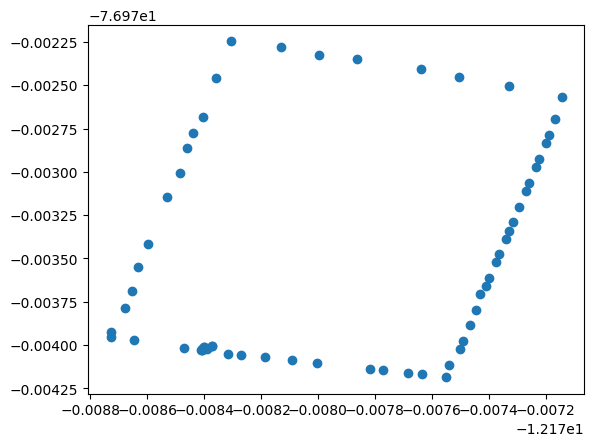

In [ ]:
#Eliminación de filas donde el drone se está elevando
alturasenalada = 50
rangodeerror = 3
data_base.drop(data_base.index[data_base["altitud"] <alturasenalada-rangodeerror], axis=0, inplace=True)
data_base.drop(data_base.index[data_base["altitud"] >alturasenalada+rangodeerror], axis=0, inplace=True)
print(data_base)

#Graficando los puntos de UTM
x, y = np.array([]), np.array([])
indicador = 70     #70
variador_1=1
variador_2=1
for i in data_base["latitud"]:
  if variador_1<indicador:
    x = np.append(x, [i])
    variador_1 = variador_1+1
for i in data_base["longitud"]:
  if variador_2<indicador:
    y = np.append(y, [i])
    variador_2 = variador_2+1
fig, ax = plt.subplots()
ax.scatter(x = x, y = y)

In [ ]:
hora_inicial, hora_final = 19*60+1, 21*60 + 48
numero_de_filas = 64
intervalo_de_tiempo = (hora_final-hora_inicial)/numero_de_filas
tiempo_de_vuelo = hora_final - hora_inicial
tiempo_por_tramo = tiempo_de_vuelo // 4
minuto_por_tramo = tiempo_por_tramo //60
segundo_por_tramo = tiempo_por_tramo - minuto_por_tramo*60
array_de_tiempo = np.arange(hora_inicial, hora_final, intervalo_de_tiempo)

data_base=data_base.assign(tiempo=array_de_tiempo)

#Cambio de coordenadas latitud y longitud
perimetro_de_tierra = 6371000*3.14159*2 #metros
relacion = perimetro_de_tierra/360
data_base["latitud"] = data_base["latitud"] * relacion
data_base["longitud"] = data_base["longitud"] * relacion
print(data_base)

          Fecha      Hora       latitud      longitud  altitud       tiempo
56   28/04/2023  10:19:01 -1.354172e+06 -8.559111e+06     49.8  1141.000000
57   28/04/2023  10:19:03 -1.354172e+06 -8.559111e+06     50.0  1143.609375
58   28/04/2023  10:19:06 -1.354174e+06 -8.559114e+06     49.7  1146.218750
59   28/04/2023  10:19:10 -1.354176e+06 -8.559114e+06     49.9  1148.828125
60   28/04/2023  10:19:13 -1.354176e+06 -8.559113e+06     49.7  1151.437500
..          ...       ...           ...           ...      ...          ...
115  28/04/2023  10:21:30 -1.354203e+06 -8.559108e+06     50.2  1294.953125
116  28/04/2023  10:21:34 -1.354183e+06 -8.559113e+06     50.2  1297.562500
117  28/04/2023  10:21:36 -1.354176e+06 -8.559114e+06     50.0  1300.171875
118  28/04/2023  10:21:39 -1.354176e+06 -8.559114e+06     50.0  1302.781250
119  28/04/2023  10:21:48 -1.354175e+06 -8.559113e+06     50.0  1305.390625

[64 rows x 6 columns]



          Fecha      Hora      latitud     longitud  altitud       tiempo
56   28/04/2023  10:19:01 -4172.101862 -9111.395328     49.8  1141.000000
57   28/04/2023  10:19:03 -4171.932846 -9111.450926     50.0  1143.609375
58   28/04/2023  10:19:06 -4174.046660 -9113.529157     49.7  1146.218750
59   28/04/2023  10:19:10 -4176.032599 -9114.028422     49.9  1148.828125
60   28/04/2023  10:19:13 -4176.140458 -9113.327895     49.7  1151.437500
..          ...       ...          ...          ...      ...          ...
115  28/04/2023  10:21:30 -4202.670433 -9107.767041     50.2  1294.953125
116  28/04/2023  10:21:34 -4182.818820 -9112.580665     50.2  1297.562500
117  28/04/2023  10:21:36 -4175.894718 -9114.132945     50.0  1300.171875
118  28/04/2023  10:21:39 -4176.494058 -9114.230797     50.0  1302.781250
119  28/04/2023  10:21:48 -4175.268691 -9112.531740     50.0  1305.390625

[64 rows x 6 columns]


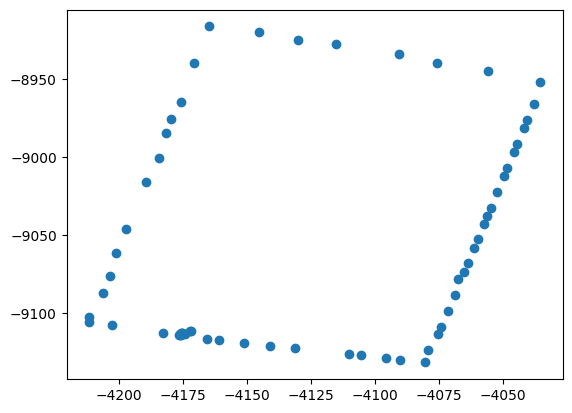

In [ ]:
#Visualización de valores de latitud y longitud en metros
data_visualization = data_base.drop(['Fecha', 'Hora', 'altitud', 'tiempo'], axis=1)
data_visualization["latitud"] = data_visualization["latitud"] * (-1)
data_visualization["latitud"] = data_visualization["latitud"] - ((data_visualization["latitud"] // 10000)*10000)

data_visualization["longitud"] = data_visualization["longitud"] * (-1)
data_visualization["longitud"] = data_visualization["longitud"] - ((data_visualization["longitud"] // 10000)*10000)

#Trasladando datos
data_base["latitud"] = data_visualization["latitud"] * (-1)
data_base["longitud"] = data_visualization["longitud"] * (-1)
print()
print(data_base)


x, y = np.array([]), np.array([])
indicador = 70     #70
variador_1=1
variador_2=1
for i in data_base["latitud"]:
  if variador_1<indicador:
    x = np.append(x, [i])
    variador_1 = variador_1+1
for i in data_base["longitud"]:
  if variador_2<indicador:
    y = np.append(y, [i])
    variador_2 = variador_2+1
fig, ax = plt.subplots()
ax.scatter(x = x, y = y)
#latitud, eje x
#longitud, eje y

In [ ]:
#Separamos las filas en los 4 tramos
primer_limite, segundo_limite, tercer_limite, cuarto_limite = tiempo_por_tramo, tiempo_por_tramo*2, tiempo_por_tramo*3, tiempo_por_tramo*4

#cuarto tramo
data_base_4 = data_base.drop(data_base.index[data_base["tiempo"] <(tercer_limite+hora_inicial)], axis=0, inplace=False)

#tercer_tramo
data_base_3 = data_base.drop(data_base.index[data_base["tiempo"] >(tercer_limite+hora_inicial)], axis=0, inplace=False)
data_base_3 = data_base_3.drop(data_base_3.index[data_base_3["tiempo"] <(segundo_limite+hora_inicial)], axis=0, inplace=False)

#segundo_tramo
data_base_2 = data_base.drop(data_base.index[data_base["tiempo"] >(segundo_limite+hora_inicial)], axis=0, inplace=False)
data_base_2 = data_base_2.drop(data_base_2.index[data_base_2["tiempo"] <(primer_limite+hora_inicial)], axis=0, inplace=False)

#primer_tramo
data_base_1 = data_base.drop(data_base.index[data_base["tiempo"] >(primer_limite+hora_inicial)], axis=0, inplace=False)


         Fecha      Hora      latitud     longitud  altitud       tiempo
56  28/04/2023  10:19:01 -4172.101862 -9111.395328     49.8  1141.000000
57  28/04/2023  10:19:03 -4171.932846 -9111.450926     50.0  1143.609375
58  28/04/2023  10:19:06 -4174.046660 -9113.529157     49.7  1146.218750
59  28/04/2023  10:19:10 -4176.032599 -9114.028422     49.9  1148.828125
60  28/04/2023  10:19:13 -4176.140458 -9113.327895     49.7  1151.437500
61  28/04/2023  10:19:15 -4175.191966 -9112.492821     49.7  1154.046875
62  28/04/2023  10:19:18 -4175.564469 -9112.829742     49.5  1156.656250
63  28/04/2023  10:19:20 -4175.204198 -9113.698173     49.6  1159.265625
64  28/04/2023  10:19:22 -4165.687032 -9116.449134     49.8  1161.875000
65  28/04/2023  10:19:23 -4160.862288 -9117.255296     50.0  1164.484375
66  28/04/2023  10:19:25 -4151.259503 -9118.942122     49.9  1167.093750
67  28/04/2023  10:19:27 -4140.860562 -9120.840218     50.0  1169.703125
68  28/04/2023  10:19:30 -4131.035386 -9122.561514 

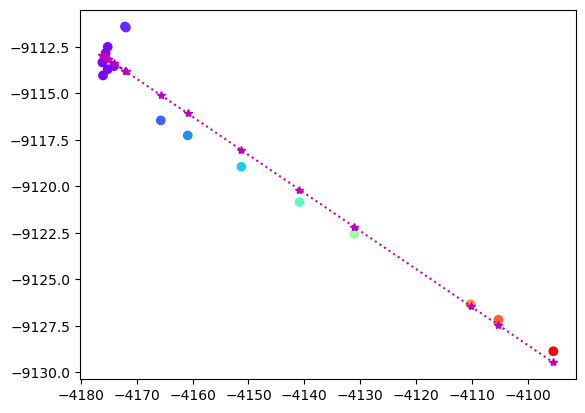

w = [-0.20471878], b = -9967.884226924478


Error Cuadrático Medio (MSE) = 1.1502723265202945
Raíz del Error Cuadrático Medio (RMSE) = 1.0725074948550684


Coeficiente de Determinación R2 = 0.9647050675665335


In [ ]:
x, y = np.array([]), np.array([])
for i in data_base_1["latitud"]:
  x = np.append(x, [i])
for i in data_base_1["longitud"]:
  y = np.append(y, [i])
print(data_base_1)
fig, ax = plt.subplots()
ax.scatter(x = x, y = y, c= x, cmap = "rainbow")
d = np.polyfit(x,y, 1)
p = np.poly1d(d)
plt.plot(x, p(x), "m:*")
plt.show()


regresion_lineal = LinearRegression() # creamos una instancia de LinearRegression
# instruimos a la regresión lineal que aprenda de los datos (x,y)
regresion_lineal.fit(x.reshape(-1,1), y)
# vemos los parámetros que ha estimado la regresión lineal
print('w = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_))

print("")
print("")
# Predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x.reshape(-1,1))
# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_1 = mean_squared_error(y_true = y, y_pred = prediccion_entrenamiento)
# La raíz cuadrada del MSE es el RMSE
rmse_1 = np.sqrt(mse_1)
print('Error Cuadrático Medio (MSE) = ' + str(mse_1))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse_1))


print("")
print("")
# calculamos el coeficiente de determinación R2
r2_1 = regresion_lineal.score(x.reshape(-1,1), y)
print('Coeficiente de Determinación R2 = ' + str(r2_1))

         Fecha      Hora      latitud     longitud  altitud       tiempo
73  28/04/2023  10:19:40 -4080.551820 -9131.700617     49.9  1185.359375
74  28/04/2023  10:19:42 -4079.374267 -9123.663454     49.9  1187.968750
75  28/04/2023  10:19:45 -4075.216692 -9113.551396     50.0  1190.578125
76  28/04/2023  10:19:46 -4073.955743 -9108.709973     50.1  1193.187500
77  28/04/2023  10:19:48 -4071.262604 -9098.396653     49.9  1195.796875
78  28/04/2023  10:19:50 -4068.774064 -9088.598164     49.9  1198.406250
79  28/04/2023  10:19:52 -4067.426382 -9078.208119     50.0  1201.015625
80  28/04/2023  10:19:53 -4064.967865 -9073.327777     50.0  1203.625000
81  28/04/2023  10:19:54 -4063.620183 -9067.869223     49.9  1206.234375
82  28/04/2023  10:19:56 -4061.097172 -9057.977331     50.0  1208.843750
83  28/04/2023  10:19:57 -4059.715021 -9052.559919     50.1  1211.453125
84  28/04/2023  10:19:59 -4057.247607 -9042.743639     49.9  1214.062500
85  28/04/2023  10:20:00 -4055.987770 -9037.765446 

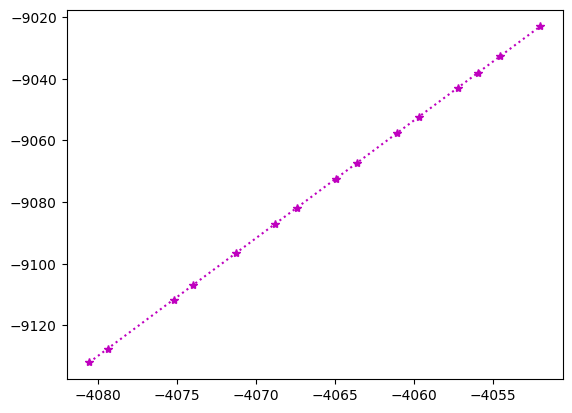

w = [3.82225584], b = 6464.905951108607


Error Cuadrático Medio (MSE) = 2.9100738840904667
Raíz del Error Cuadrático Medio (RMSE) = 1.7058938665961803


Coeficiente de Determinación R2 = 0.9974036225737162


In [ ]:
excedente_2 = 1
data_base_2 = data_base_2.drop(data_base_2.index[data_base_2["tiempo"] <(primer_limite+hora_inicial+excedente_2)], axis=0, inplace=False)
x, y = np.array([]), np.array([])
for i in data_base_2["latitud"]:
  x = np.append(x, [i])
for i in data_base_2["longitud"]:
  y = np.append(y, [i])
print(data_base_2)
ax.scatter(x = x, y = y, c= x, cmap = "rainbow")
d = np.polyfit(x,y, 1)
p = np.poly1d(d)
plt.plot(x, p(x), "m:*")
plt.show()


regresion_lineal = LinearRegression()
# instruimos a la regresión lineal que aprenda de los datos (x,y)
regresion_lineal.fit(x.reshape(-1,1), y)
# vemos los parámetros que ha estimado la regresión lineal
print('w = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_))


print("")
print("")
# Predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x.reshape(-1,1))
# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_2 = mean_squared_error(y_true = y, y_pred = prediccion_entrenamiento)
# La raíz cuadrada del MSE es el RMSE
rmse_2 = np.sqrt(mse_2)
print('Error Cuadrático Medio (MSE) = ' + str(mse_2))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse_2))


print("")
print("")
# calculamos el coeficiente de determinación R2
r2_2 = regresion_lineal.score(x.reshape(-1,1), y)
print('Coeficiente de Determinación R2 = ' + str(r2_2))

          Fecha      Hora      latitud     longitud  altitud       tiempo
95   28/04/2023  10:20:18 -4035.413390 -8951.595010     49.7  1242.765625
96   28/04/2023  10:20:24 -4055.813194 -8944.664237     49.8  1245.375000
97   28/04/2023  10:20:28 -4075.500239 -8939.253496     49.9  1247.984375
98   28/04/2023  10:20:32 -4090.517101 -8934.005100     50.1  1250.593750
99   28/04/2023  10:20:37 -4115.217921 -8927.395679     50.4  1253.203125
100  28/04/2023  10:20:40 -4130.168067 -8924.825966     50.3  1255.812500
101  28/04/2023  10:20:44 -4145.141563 -8919.625384     50.2  1258.421875
102  28/04/2023  10:20:48 -4164.692950 -8916.096060     50.2  1261.031250


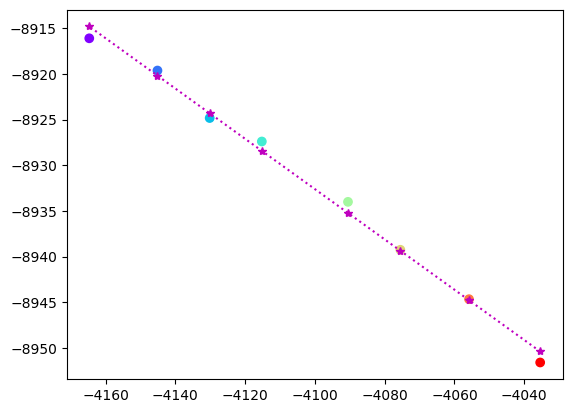

w = [-0.27530659], b = -10061.368563671474


Error Cuadrático Medio (MSE) = 0.7828006481197767
Raíz del Error Cuadrático Medio (RMSE) = 0.8847602206924635


Coeficiente de Determinación R2 = 0.9941985067070215


In [ ]:
excedente_inferior_3 = 18
excedente_superior_3 = 1
data_base_3 = data_base_3.drop(data_base_3.index[data_base_3["tiempo"] >(tercer_limite+hora_inicial-excedente_superior_3)], axis=0, inplace=False)
data_base_3 = data_base_3.drop(data_base_3.index[data_base_3["tiempo"] <(segundo_limite+hora_inicial+excedente_inferior_3)], axis=0, inplace=False)
x, y = np.array([]), np.array([])
for i in data_base_3["latitud"]:
  x = np.append(x, [i])
for i in data_base_3["longitud"]:
  y = np.append(y, [i])
print(data_base_3)
fig, ax = plt.subplots()
ax.scatter(x = x, y = y, c= x, cmap = "rainbow")
d = np.polyfit(x,y, 1)
p = np.poly1d(d)
plt.plot(x, p(x), "m:*")
plt.show()


regresion_lineal = LinearRegression() # creamos una instancia de LinearRegression
# instruimos a la regresión lineal que aprenda de los datos (x,y)
regresion_lineal.fit(x.reshape(-1,1), y)
# vemos los parámetros que ha estimado la regresión lineal
print('w = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_))

print("")
print("")
# Predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x.reshape(-1,1))
# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_3 = mean_squared_error(y_true = y, y_pred = prediccion_entrenamiento)
# La raíz cuadrada del MSE es el RMSE
rmse_3 = np.sqrt(mse_3)
print('Error Cuadrático Medio (MSE) = ' + str(mse_3))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse_3))


print("")
print("")
# calculamos el coeficiente de determinación R2
r2_3 = regresion_lineal.score(x.reshape(-1,1), y)
print('Coeficiente de Determinación R2 = ' + str(r2_3))

          Fecha      Hora      latitud     longitud  altitud       tiempo
104  28/04/2023  10:20:57 -4175.600051 -8964.752695     50.2  1266.250000
105  28/04/2023  10:21:00 -4179.474079 -8975.168315     50.0  1268.859375
106  28/04/2023  10:21:02 -4181.714655 -8984.481994     49.9  1271.468750
107  28/04/2023  10:21:05 -4184.437817 -9000.361728     49.9  1274.078125
108  28/04/2023  10:21:09 -4189.531652 -9015.723294     50.1  1276.687500
109  28/04/2023  10:21:15 -4197.132931 -9045.884893     50.0  1279.296875
110  28/04/2023  10:21:18 -4200.938018 -9061.187526     50.1  1281.906250
111  28/04/2023  10:21:20 -4203.496611 -9076.524629     50.2  1284.515625
112  28/04/2023  10:21:22 -4206.223108 -9086.973607     50.0  1287.125000
113  28/04/2023  10:21:26 -4211.556013 -9102.344069     50.0  1289.734375
114  28/04/2023  10:21:28 -4211.608274 -9106.010163     50.1  1292.343750


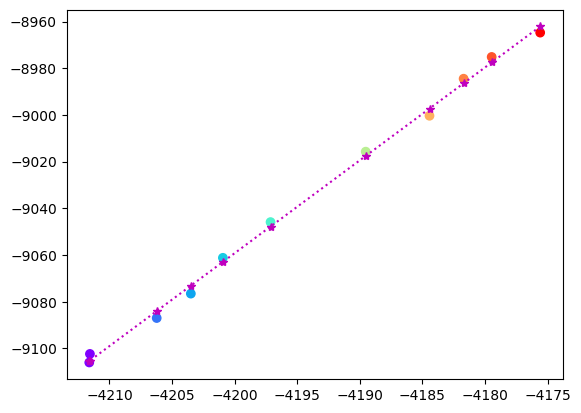

w = [3.97934493], b = 7654.034520500429


Error Cuadrático Medio (MSE) = 5.9125052088292644
Raíz del Error Cuadrático Medio (RMSE) = 2.4315643542438403


Coeficiente de Determinación R2 = 0.9976209668540122


In [ ]:
excedente_4 = 11
data_base_4 = data_base_4.drop(data_base_4.index[data_base_4["tiempo"] >(cuarto_limite+hora_inicial-excedente_4)], axis=0, inplace=False)
x, y = np.array([]), np.array([])
for i in data_base_4["latitud"]:
  x = np.append(x, [i])
for i in data_base_4["longitud"]:
  y = np.append(y, [i])
print(data_base_4)
fig, ax = plt.subplots()
ax.scatter(x = x, y = y, c= x, cmap = "rainbow")
d = np.polyfit(x,y, 1)
p = np.poly1d(d)
plt.plot(x, p(x), "m:*")
plt.show()


regresion_lineal = LinearRegression() # creamos una instancia de LinearRegression
# instruimos a la regresión lineal que aprenda de los datos (x,y)
regresion_lineal.fit(x.reshape(-1,1), y)
# vemos los parámetros que ha estimado la regresión lineal
print('w = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_))

print("")
print("")
# Predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x.reshape(-1,1))
# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_4 = mean_squared_error(y_true = y, y_pred = prediccion_entrenamiento)
# La raíz cuadrada del MSE es el RMSE
rmse_4 = np.sqrt(mse_4)
print('Error Cuadrático Medio (MSE) = ' + str(mse_4))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse_4))


print("")
print("")
# calculamos el coeficiente de determinación R2
r2_4 = regresion_lineal.score(x.reshape(-1,1), y)
print('Coeficiente de Determinación R2 = ' + str(r2_4))

In [ ]:
##Resultados finales

error_cuadratico_medio_promedio = (mse_1 + mse_2 + mse_3 + mse_4)/4
raiz_error_cuadratico_promedio = (rmse_1 + rmse_2 + rmse_3 + rmse_4)/4
coeficiente_de_determinacion_promedio = (r2_1 + r2_2 + r2_3 + r2_4)/4
print('Promedio del error cuadrático Medio (MSE) = ' + str(error_cuadratico_medio_promedio))
print('Promedio raíz del error cuadrático medio (RMSE) = ' + str(raiz_error_cuadratico_promedio))

print('Coeficiente de Determinación R2 = ' + str(coeficiente_de_determinacion_promedio))

Promedio del error cuadrático Medio (MSE) = 2.6889130168899507
Promedio raíz del error cuadrático medio (RMSE) = 1.5236814840968882
Coeficiente de Determinación R2 = 0.9884820409253209


# Tercer modelo para la obtención del error cuadrático promedio

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import files
archivo = files.upload()
data_base = pd.read_csv("DatosPosicion_NodeDrone.csv")
print(data_base)

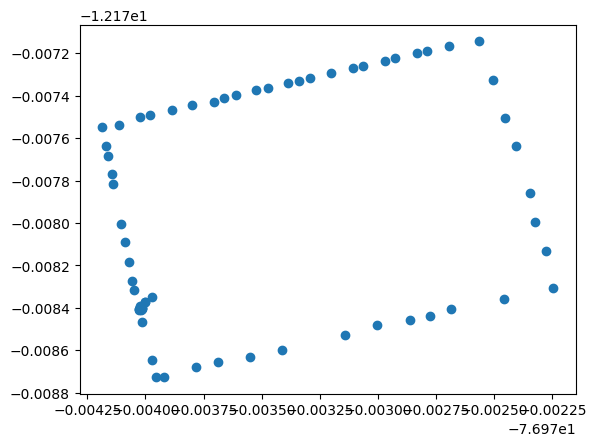

In [ ]:
#Eliminación de filas donde el drone se está elevando
alturasenalada = 50
rangodeerror = 3
data_base.drop(data_base.index[data_base["altitud"] <alturasenalada-rangodeerror], axis=0, inplace=True)
data_base.drop(data_base.index[data_base["altitud"] >alturasenalada+rangodeerror], axis=0, inplace=True)
#print(data_base)
#Graficando los puntos de UTM
fig, ax = plt.subplots()
a = np.append(np.array(data_base["longitud"]), -76.97397308059985)
b = np.append(np.array(data_base["latitud"]), -12.178348357599546)

ax.scatter(x = a, y = b)

In [ ]:
hora_inicial, hora_final = data_base.iat[0, 1], data_base.iat[len(data_base.axes[0])-1,1]
hora_inicial = int(hora_inicial[3:5]) * 60 + int(hora_inicial[6:8])
hora_final = int(hora_final[3:5]) * 60 + int(hora_final[6:8])
num_filas = len(data_base.axes[0])
tiempo_por_tramo = (hora_final - hora_inicial) / 4   #167/4
array_de_tiempo = np.arange(hora_inicial, hora_final, (hora_final-hora_inicial)/num_filas)

data_base=data_base.assign(tiempo=array_de_tiempo)

#Cambio de coordenadas latitud y longitud
perimetro_de_tierra = 6371000*math.pi*2 #metros
relacion = perimetro_de_tierra/360
data_base["latitud"] = data_base["latitud"] * relacion
data_base["longitud"] = data_base["longitud"] * relacion
print(data_base)

#Definimos waipoints
waypoint_1, waypoint_2 = np.array([-76.97397308059985,-12.178348357599546]), np.array([-76.97418308212023, -12.17754151202647])
waypoint_3, waypoint_4 = np.array([-76.97254746245225,-12.177129476860411]), np.array([-76.97224201256732, -12.178312790660689])
waypoint_5 = np.array([-76.97391105627233, -12.178715687841578])

#transformación de utm a metros
b=np.array([8550000,1350000])
waypoint_5 = np.add(np.dot(waypoint_5, relacion), b)
waypoint_4 = np.add(np.dot(waypoint_4, relacion), b)
waypoint_3 = np.add(np.dot(waypoint_3, relacion), b)
waypoint_2 = np.add(np.dot(waypoint_2, relacion), b)
waypoint_1 = np.add(np.dot(waypoint_1, relacion), b)

#definimos líneas
la_1_x = np.array([waypoint_1[0], waypoint_2[0]])
la_1_y = np.array([waypoint_1[1], waypoint_2[1]])
la_2_x = np.array([waypoint_2[0], waypoint_3[0]])
la_2_y = np.array([waypoint_2[1], waypoint_3[1]])
la_3_x = np.array([waypoint_3[0], waypoint_4[0]])
la_3_y = np.array([waypoint_3[1], waypoint_4[1]])
la_4_x = np.array([waypoint_4[0], waypoint_5[0]])
la_4_y = np.array([waypoint_4[1], waypoint_5[1]])

la_x = (la_1_x, la_2_x, la_3_x, la_4_x)
la_y = (la_1_y, la_2_y, la_3_y, la_4_y)

print(waypoint_1)
print(waypoint_2)
print(waypoint_3)
print(waypoint_4)


          Fecha      Hora       latitud      longitud  altitud       tiempo
56   28/04/2023  10:19:01 -1.354173e+06 -8.559119e+06     49.8  1141.000000
57   28/04/2023  10:19:03 -1.354173e+06 -8.559119e+06     50.0  1143.609375
58   28/04/2023  10:19:06 -1.354175e+06 -8.559121e+06     49.7  1146.218750
59   28/04/2023  10:19:10 -1.354177e+06 -8.559121e+06     49.9  1148.828125
60   28/04/2023  10:19:13 -1.354177e+06 -8.559121e+06     49.7  1151.437500
..          ...       ...           ...           ...      ...          ...
115  28/04/2023  10:21:30 -1.354204e+06 -8.559115e+06     50.2  1294.953125
116  28/04/2023  10:21:34 -1.354184e+06 -8.559120e+06     50.2  1297.562500
117  28/04/2023  10:21:36 -1.354177e+06 -8.559121e+06     50.0  1300.171875
118  28/04/2023  10:21:39 -1.354178e+06 -8.559121e+06     50.0  1302.781250
119  28/04/2023  10:21:48 -1.354176e+06 -8.559120e+06     50.0  1305.390625

[64 rows x 6 columns]
[-9115.29023754 -4170.55227516]
[-9138.64134119 -4080.83514085]
[

          Fecha      Hora      latitud     longitud  altitud       tiempo
56   28/04/2023  10:19:01 -4173.245683 -9118.624907     49.8  1141.000000
57   28/04/2023  10:19:03 -4173.076667 -9118.680504     50.0  1143.609375
58   28/04/2023  10:19:06 -4175.190482 -9120.758737     49.7  1146.218750
59   28/04/2023  10:19:10 -4177.176424 -9121.258003     49.9  1148.828125
60   28/04/2023  10:19:13 -4177.284283 -9120.557475     49.7  1151.437500
..          ...       ...          ...          ...      ...          ...
115  28/04/2023  10:21:30 -4203.814280 -9114.996616     50.2  1294.953125
116  28/04/2023  10:21:34 -4183.962650 -9119.810245     50.2  1297.562500
117  28/04/2023  10:21:36 -4177.038542 -9121.362526     50.0  1300.171875
118  28/04/2023  10:21:39 -4177.637883 -9121.460377     50.0  1302.781250
119  28/04/2023  10:21:48 -4176.412515 -9119.761319     50.0  1305.390625

[64 rows x 6 columns]
49.9421875


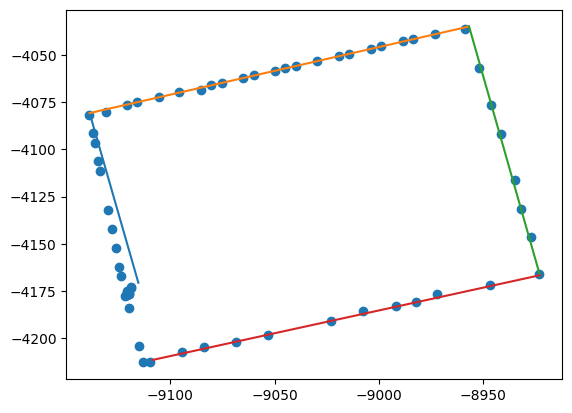

In [ ]:
#Visualización de valores de latitud y longitud en metros
data_base["latitud"] = (data_base["latitud"]*(-1) - ((data_base["latitud"]*(-1) // 10000)*10000))*(-1)
data_base["longitud"] = (data_base["longitud"]*(-1) - ((data_base["longitud"]*(-1) // 10000)*10000))*(-1)
print(data_base)
print(data_base["altitud"].mean())

fig, ax = plt.subplots()
ax.scatter(x = data_base["longitud"], y = data_base["latitud"])
#for i in range(1, 5):
#  plt.plot(x, p(x), "m:*", la_x[i-1], la_y[i-1])
plt.plot(la_1_x, la_1_y)
plt.plot(la_2_x, la_2_y)
plt.plot(la_3_x, la_3_y)
plt.plot(la_4_x, la_4_y)

In [ ]:
#Separamos las filas en los 4 tramos
division_1, division_2, division_3, division_4= 46+hora_inicial, 104+hora_inicial, 122+hora_inicial, 152+hora_inicial
#cuarto tramo
data_base_4 = data_base.drop(data_base.index[data_base["tiempo"] <division_3], axis=0, inplace=False)
data_base_4 = data_base_4.drop(data_base_4.index[data_base_4["tiempo"] >division_4], axis=0, inplace=False)

#tercer_tramo
data_base_3 = data_base.drop(data_base.index[data_base["tiempo"] >division_3], axis=0, inplace=False)
data_base_3 = data_base_3.drop(data_base_3.index[data_base_3["tiempo"] <division_2], axis=0, inplace=False)

#segundo_tramo
data_base_2 = data_base.drop(data_base.index[data_base["tiempo"] >division_2], axis=0, inplace=False)
data_base_2 = data_base_2.drop(data_base_2.index[data_base_2["tiempo"] <division_1], axis=0, inplace=False)

#primer_tramo
data_base_1 = data_base.drop(data_base.index[data_base["tiempo"] >division_1], axis=0, inplace=False)

#creando lista de dataframes
list_data_base = (data_base_1, data_base_2, data_base_3, data_base_4)

DATA_BASE 1
Error cuadrático medio: 27.11862867023965
Raiz del error cuadrático medio: 5.207554960846755 metros


DATA_BASE 2
Error cuadrático medio: 0.23069924198293038
Raiz del error cuadrático medio: 0.4803116092527125 metros


DATA_BASE 3
Error cuadrático medio: 0.6064475559666251
Raiz del error cuadrático medio: 0.7787474275826696 metros


DATA_BASE 4
Error cuadrático medio: 0.6558853266928804
Raiz del error cuadrático medio: 0.8098674747715705 metros


Para el promedio de la raiz del RMSD se usó los 3 últimos errores obtenidos
Raiz del error cuadrático promedio: 0.6896421705356509 metros


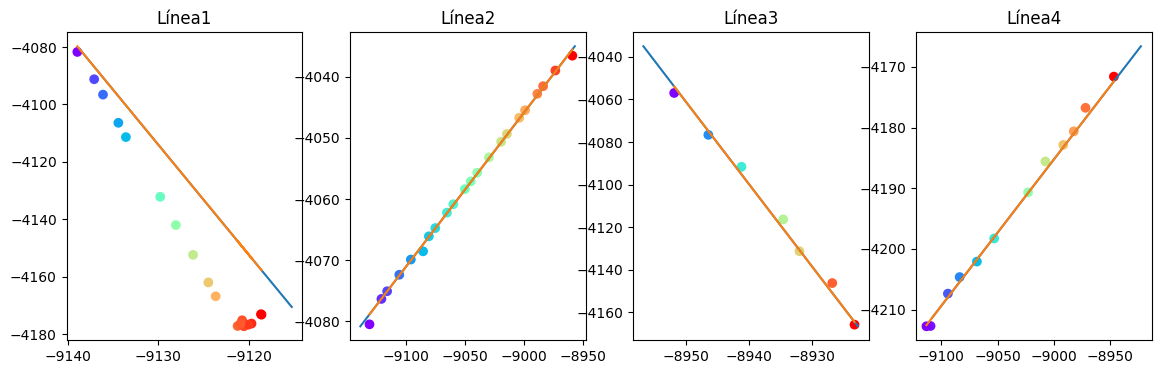

In [ ]:
fig = plt.figure(figsize = (14,4))
fig.tight_layout()
colores = ["blue", "green", "red", "cyan", "cyan"]
error_promedio = 0
for i in range(0, 4):
  #configuracion de las imágenes
  ax = plt.subplot(1,4, i+1)


  #Graficando datos
  x, y = list_data_base[i]["longitud"], list_data_base[i]["latitud"]
  ax.scatter(x = x, y = y, c= x, cmap = "rainbow")
  ax.set_title("Línea"+str(i+1))


  #Calculo del angulo
  sen = (la_x[i][1]-la_x[i][0])/(((la_y[i][1]-la_y[i][0])**2+(la_x[i][1]-la_x[i][0])**2)**0.5)

  #Datos de línea fijada y predicción
  w = (la_y[i][1]-la_y[i][0])/(la_x[i][1]-la_x[i][0])
  b = la_y[i][1] - w*la_x[i][1]
  list_data_base[i]["latitud_pred"] = list_data_base[i]["longitud"]*w+b
  list_data_base[i]["EC"] = ((list_data_base[i]["latitud_pred"]- list_data_base[i]["latitud"])*sen)**2
  """print("Latitud predicha: ")
  print(np.array(list_data_base[i]["latitud_pred"]))
  print("Latitud: ")
  print(np.array(list_data_base[i]["latitud"]))
  print("Error: ")
  print(np.array(list_data_base[i]["latitud_pred"]- list_data_base[i]["latitud"]))"""


  #Línea de tendencia y línea fijada
  p = np.poly1d(np.polyfit(x,y, 1))
    #la siguiente línea es para graficar tambien la línea de tendencia
    #plt.plot(x, p(x), "m:*", la_x[i], la_y[i], list_data_base[i]["longitud"], list_data_base[i]["latitud_pred"])
  plt.plot(la_x[i], la_y[i], list_data_base[i]["longitud"], list_data_base[i]["latitud_pred"])
  if (i!=0): error_promedio = error_promedio + (list_data_base[i]["EC"].mean())**0.5


  #Impresión de resultados
  print("DATA_BASE " + str(i+1))
  print("Error cuadrático medio: " + str(list_data_base[i]["EC"].mean()))
  print("Raiz del error cuadrático medio: " + str((list_data_base[i]["EC"].mean())**0.5) + " metros")
  print("")
  print("")
  #print("")

print("Para el promedio de la raiz del RMSD se usó los 3 últimos errores obtenidos")
print("Raiz del error cuadrático promedio: " + str(error_promedio/3)+ " metros")

# Cuarto modelo para la obtención del error cuadrático promedio


Saving DatosPosicion_NodeDrone.csv to DatosPosicion_NodeDrone (3).csv



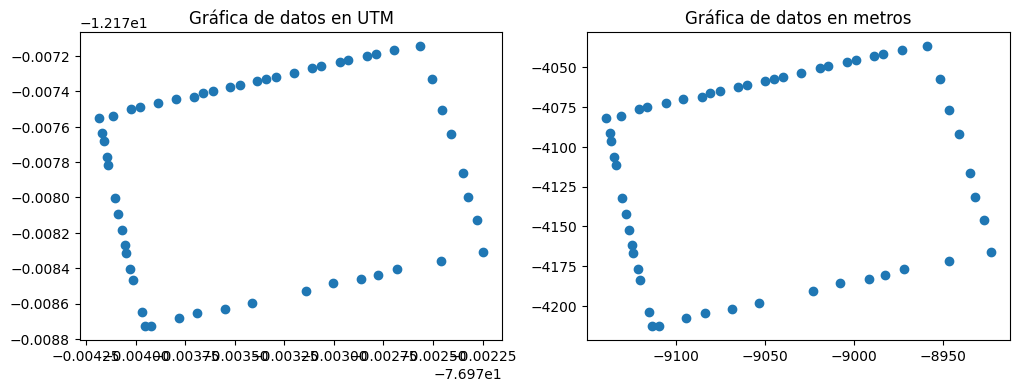

In [ ]:
#SE IMPORTAN LIBRERÍAS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.metrics import mean_squared_error
from google.colab import files




#SE SUBE LA DATA
archivo = files.upload()
data_base = pd.read_csv("DatosPosicion_NodeDrone.csv")




#SE LIMPIA LA DATA
#Eliminamos datos que se dan mientras el ascenso del dron
alturasenalada,rangodeerror = 50, 3
data_base.drop(data_base.index[data_base["altitud"] <alturasenalada-rangodeerror], axis=0, inplace=True)
data_base.drop(data_base.index[data_base["altitud"] >alturasenalada+rangodeerror], axis=0, inplace=True)
#Separamos las filas en los tramos
hora_inicial, hora_final = data_base.iat[0, 1], data_base.iat[len(data_base.axes[0])-1,1]  #Lee primera y última hora de la columna
hora_inicial = int(hora_inicial[3:5]) * 60 + int(hora_inicial[6:8])                        #Segundos de inicio
hora_final = int(hora_final[3:5]) * 60 + int(hora_final[6:8])                              #Segundos de final
num_filas = len(data_base.axes[0])
tiempo_por_tramo = (hora_final - hora_inicial) / 4
array_de_tiempo = np.arange(hora_inicial, hora_final, (hora_final-hora_inicial)/num_filas)
data_base=data_base.assign(tiempo=array_de_tiempo)
#print("Tiempo de vuelo en segundos: " + str(hora_final - hora_inicial))                    #167
print("")
#Eliminamos datos iniciales donde el dron está empieza inmovil
data_base.drop(data_base.index[data_base["tiempo"] < hora_inicial + 20], axis = 0, inplace = True)
#Eliminamos datos finales donde el dron permanece inmóvil
data_base.drop(data_base.index[data_base["tiempo"] > hora_inicial + 161], axis = 0, inplace = True)
#Graficando los puntos de UTM
fig = plt.figure(figsize=(12,4))
ax = plt.subplot(1,2,1)
plt.title("Gráfica de datos en UTM")
ax.scatter(x = data_base["longitud"], y = data_base["latitud"])




#SE TRANSFORMA LA DATA
perimetro_de_tierra = 6371000*math.pi*2 #metros
relacion = perimetro_de_tierra/360
data_base["latitud"] = data_base["latitud"] * relacion
data_base["longitud"] = data_base["longitud"] * relacion
data_base["latitud"] = (data_base["latitud"]*(-1) - ((data_base["latitud"]*(-1) // 10000)*10000))*(-1)
data_base["longitud"] = (data_base["longitud"]*(-1) - ((data_base["longitud"]*(-1) // 10000)*10000))*(-1)
ax = plt.subplot(1,2,2)
plt.title("Gráfica de datos en metros")
ax.scatter(x = data_base["longitud"], y = data_base["latitud"])

In [ ]:
#Establecemos los puntos de recorrido en Flytnow
latitud, longitud, waypoint, linea =[], [], pd.DataFrame(), np.array([])
#manual = input("¿Desea introducir os puntos de coordenadas de forma manual? (y/n): ")
manual = "n"
if manual == "y":
  num_iteraciones = input("¿Cuál es el número de puntos establecidos en Flytnow?: ")
  for i in range(0,num_iteraciones):
    print("PUNTO N°"+ str(i+1))
    latitud[i] = input("Introduce latitud: ")
    longitud[i] = input("Introduce longitud: ")
    print("")
elif manual == "n":
  latitud = [-12.178348357599546,-12.17754151202647,-12.177129476860411,-12.178312790660689,-12.178715687841578]
  longitud = [-76.97397308059985,-76.97418308212023,-76.97254746245225,-76.97224201256732,-76.97391105627233]
  num_iteraciones = len(latitud)
else: print("Error, asegúrese de no haber presionado la tecla Mayus")

#Establecemos waypoints en metros
for i in range(0, num_iteraciones):
  #transformamos de UTM a metros
  latitud[i] = np.add(np.dot(latitud[i], relacion), 1350000)
  longitud[i] = np.add(np.dot(longitud[i], relacion), 8550000)

waypoint["latitud"] = latitud
waypoint["longitud"] = longitud
#Establecemos líneas
for i in range(0, num_iteraciones-1):
  if i==0:
    linea = np.array([[[waypoint.iat[i,1], waypoint.iat[i+1,1]],[waypoint.iat[i,0], waypoint.iat[i+1,0]]]])
  else:
    linea = np.append(linea, [[[waypoint.iat[i,1], waypoint.iat[i+1,1]],[waypoint.iat[i,0], waypoint.iat[i+1,0]]]], axis = 0)

In [ ]:
#Método de los ángulos, aquí usamos los puntos registrados por el dron
long_registro, lat_registro, num_registro = np.array(data_base["longitud"]), np.array(data_base["latitud"]), len(data_base["altitud"])
print_angulo, error_angulo = np.array([]), np.array([])
for i in range(0, num_registro-1):
  #Calculo del ángulo de las líneas
  dif_horizontal, dif_vertical = (long_registro[i+1]-long_registro[i]), (lat_registro[i+1]-lat_registro[i])
  angulo = (np.arctan(dif_vertical/dif_horizontal))*180/math.pi
  if ((dif_horizontal<0) & (dif_vertical>0)):
    angulo = angulo + 180
  elif ((dif_vertical<0) & (dif_horizontal>0)):
    angulo = angulo + 360
  elif ((dif_vertical<0) & (dif_horizontal<0)):
    angulo = angulo + 180
  print_angulo = np.append(print_angulo, angulo)
  if i >0:
    dif_angulo = print_angulo[i] - print_angulo[i-1]
    if dif_angulo > 180: dif_angulo = dif_angulo-180
    error_angulo = np.append(error_angulo, int((abs(dif_angulo))))

list_data_frame = []
data_frame = pd.DataFrame()
data_base_section_x = np.array([])
data_base_section_y = np.array([])
for i in range(0, len(data_base["altitud"])):
  if (i < 2) :
    data_base_section_x = np.append(data_base_section_x, data_base.iat[i, 3])
    data_base_section_y = np.append(data_base_section_y, data_base.iat[i, 2])

  elif (error_angulo[abs(i-2)] < 40):
    data_base_section_x = np.append(data_base_section_x, data_base.iat[i, 3])
    data_base_section_y = np.append(data_base_section_y, data_base.iat[i, 2])
  else:
    #los data_base_section se convierten en un dataFrame
    data_frame["longitud"] = data_base_section_x
    data_frame["latitud"] = data_base_section_y
    list_data_frame.append(data_frame)
    data_frame = pd.DataFrame()
    data_base_section_x = np.array([])
    data_base_section_y = np.array([])
    data_base_section_x = np.append(data_base_section_x, data_base.iat[i, 3])
    data_base_section_y = np.append(data_base_section_y, data_base.iat[i, 2])

DATA_BASE 1
Error cuadrático medio: 19.538484269253033
Raiz del error cuadrático medio: 4.420235770776603 metros


DATA_BASE 2
Error cuadrático medio: 0.23069924198293038
Raiz del error cuadrático medio: 0.4803116092527125 metros


DATA_BASE 3
Error cuadrático medio: 0.6064475559666251
Raiz del error cuadrático medio: 0.7787474275826696 metros


DATA_BASE 4
Error cuadrático medio: 0.6558853266928804
Raiz del error cuadrático medio: 0.8098674747715705 metros


Para el promedio de la raiz del RMSD se usó los 3 últimos errores obtenidos
Raiz del error cuadrático promedio: 0.6896421705356509 metros


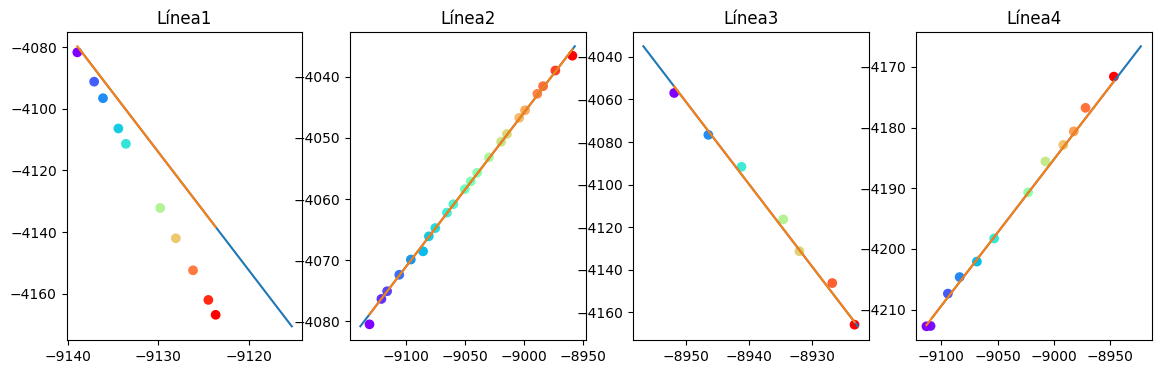

In [ ]:
fig = plt.figure(figsize = (14,4))
fig.tight_layout()
colores = ["blue", "green", "red", "cyan", "cyan"]
error_promedio = 0
for i in range(0, 4):
  #configuracion de las imágenes
  ax = plt.subplot(1,4, i+1)


  #Graficando datos
  x, y = list_data_frame[i]["longitud"], list_data_frame[i]["latitud"]
  ax.scatter(x = x, y = y, c= x, cmap = "rainbow")
  ax.set_title("Línea"+str(i+1))


  #Calculo del seno del angulo de una linea predeterminada
  sen = (linea[i][0][1]-linea[i][0][0])/(((linea[i][1][1]-linea[i][1][0])**2+(linea[i][0][1]-linea[i][0][0])**2)**0.5)

  #Datos de línea fijada y predicción
  w = (linea[i][1][1]-linea[i][1][0])/(linea[i][0][1]-linea[i][0][0])
  b = linea[i][1][1] - w*linea[i][0][1]
  list_data_frame[i]["latitud_pred"] = list_data_frame[i]["longitud"]*w+b
  list_data_frame[i]["EC"] = ((list_data_frame[i]["latitud_pred"]- list_data_frame[i]["latitud"])*sen)**2
  """print("Latitud predicha: ")
  print(np.array(list_data_base[i]["latitud_pred"]))
  print("Latitud: ")
  print(np.array(list_data_base[i]["latitud"]))
  print("Error: ")
  print(np.array(list_data_base[i]["latitud_pred"]- list_data_base[i]["latitud"]))"""


  #Línea de tendencia y línea predeterminada
  p = np.poly1d(np.polyfit(x,y, 1))
    #la siguiente línea es para graficar tambien la línea de tendencia
    #plt.plot(x, p(x), "m:*", la_x[i], la_y[i], list_data_base[i]["longitud"], list_data_base[i]["latitud_pred"])
  plt.plot(linea[i][0], linea[i][1], list_data_frame[i]["longitud"], list_data_frame[i]["latitud_pred"])
  if (i!=0): error_promedio = error_promedio + (list_data_frame[i]["EC"].mean())**0.5


  #Impresión de resultados
  print("DATA_BASE " + str(i+1))
  print("Error cuadrático medio: " + str(list_data_frame[i]["EC"].mean()))
  print("Raiz del error cuadrático medio: " + str((list_data_frame[i]["EC"].mean())**0.5) + " metros")
  print("")
  print("")
  #print("")

print("Para el promedio de la raiz del RMSD se usó los 3 últimos errores obtenidos")
print("Raiz del error cuadrático promedio: " + str(error_promedio/3)+ " metros")

Enlace para ver los puntos graficados en Colab: https://www.geogebra.org/classic/mtjeyjrf

# Borrador del proyecto/tarea

In [ ]:
import numpy as np
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt

archivo = files.upload()
data_base = pd.read_csv("DatosPosicion_NodeDrone.csv")



Saving DatosPosicion_NodeDrone.csv to DatosPosicion_NodeDrone (2).csv


In [ ]:
for i in range (1,5):
  print(i)

1
2
3
4
